In [61]:
%load_ext autoreload
%autoreload 2

[autoreload of numpy.core.multiarray failed: Traceback (most recent call last):
  File "/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 459, in superreload
    module = reload(module)
  File "/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/multiarray.py", line 16, in <module>
    from ._multiarray_umath import (
ImportError: cannot import name

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of numpy.testing._private.utils failed: Traceback (most recent call last):
  File "/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 459, in superreload
    module = reload(module)
  File "/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/testing/_private/utils.py", line 55, in <module>
    HAS_LAPACK64 = numpy.linalg.lapack_lite._ilp64
Att

In [62]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotx
import pandas as pd
from fastcore.xtras import load_pickle

from scipy.stats import sem

from gptchem.evaluator import find_learning_curve_intersection, fit_learning_curve, lc
from gptchem.settings import ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH

from gptchem.plotsettings import *
%matplotlib inline

In [63]:
crabnet_out = glob('out-crabnet/*.pkl')

In [64]:
extracted_crabnet_res = []

for out in crabnet_out:
    out = load_pickle(out)
    res = {
        "train_size": out["train_size"],
        "frac_valid": out["frac_valid"],
        "accuracy": out["accuracy"],
        "f1_macro": out["f1_macro"],
        "f1_micro": out["f1_micro"],
        "kappa": out["kappa"],
    }

    extracted_crabnet_res.append(res)

In [65]:
extracted_crabnet_res = pd.DataFrame(extracted_crabnet_res)

In [66]:
extracted_crabnet_res_grouped = extracted_crabnet_res.groupby("train_size").agg(
    ["mean", "std", sem]
)

ValueError: Only callable can be used as callback

In [ ]:
extracted_crabnet_res_grouped

frac_valid            accuracy                      f1_macro  \
                 mean  std  sem      mean       std       sem      mean   
train_size                                                                
10                1.0  0.0  0.0  0.580000  0.048990  0.024495  0.574443   
20                1.0  0.0  0.0  0.609000  0.036347  0.011494  0.598513   
50                1.0  0.0  0.0  0.654719  0.058758  0.019586  0.647273   
100               1.0  0.0  0.0  0.725581  0.074998  0.023716  0.723322   

                                f1_micro                         kappa  \
                 std       sem      mean       std       sem      mean   
train_size                                                               
10          0.049401  0.024701  0.580000  0.048990  0.024495  0.160000   
20          0.046742  0.014781  0.609000  0.036347  0.011494  0.218000   
50          0.065298  0.021766  0.654719  0.058758  0.019586  0.308978   
100         0.075733  0.023949  0.725581  0.074998  0.023716  0.450676   

                                
                 std       sem  
train_size                      
10          0.097980  0.048990  
20          0.072694  0.022988  
50          0.118679  0.039560  
100         0.149985  0.047429

## Load results

In [ ]:
all_out = glob("out/**/*.pkl")

In [ ]:
all_out = [load_pickle(p) for p in all_out]

In [ ]:
extracted_res = []
baseline = []

for out in all_out:
    res = {
        "train_size": out["num_train_points"],
        "frac_valid": out["frac_valid"],
        "accuracy": out["accuracy"],
        "f1_macro": out["f1_macro"],
        "f1_micro": out["f1_micro"],
        "kappa": out["kappa"],
        "num_classes": out["num_classes"],
        "representation": out["representation"] if "representation" in out else "mofid",
    }

    try:
        baseline_res = {
            "train_size": out["num_train_points"],
            "accuracy": out["baseline"]["accuracy"],
            "f1_macro": out["baseline"]["f1_macro"],
            "f1_micro": out["baseline"]["f1_micro"],
            "kappa": out["baseline"]["kappa"],
            "num_classes": out["num_classes"],
        }  
        baseline.append(baseline_res)
    except Exception:
        pass

    extracted_res.append(res)
   

In [ ]:
res = pd.DataFrame(extracted_res)
baseline = pd.DataFrame(baseline)

In [ ]:
grouped_res = res.groupby(["num_classes", "train_size", "representation"]).agg(
    ["mean", "std", "count", sem]
)

In [ ]:
grouped_baseline_res = baseline.groupby(["num_classes", "train_size"]).agg(["mean", "std", "count", sem])

In [ ]:
grouped_res

frac_valid                  accuracy  \
                                            mean  std count  sem      mean   
num_classes train_size representation                                        
2           10         composition           1.0  0.0     3  0.0  0.556667   
                       grouped_mof           1.0  0.0     4  0.0  0.512500   
                       mofid                 1.0  0.0    10  0.0  0.553000   
            20         composition           1.0  0.0     3  0.0  0.600000   
                       grouped_mof           1.0  0.0     4  0.0  0.542500   
                       mofid                 1.0  0.0    10  0.0  0.560000   
            50         composition           1.0  0.0     2  0.0  0.752688   
                       grouped_mof           1.0  0.0     3  0.0  0.573477   
                       mofid                 1.0  0.0    10  0.0  0.573118   
            100        composition           1.0  0.0     2  0.0  0.767442   
                       grouped_mof           1.0  0.0     3  0.0  0.604651   
                       mofid                 1.0  0.0     8  0.0  0.604651   
5           10         composition           1.0  0.0     3  0.0  0.243333   
                       grouped_mof           1.0  0.0     4  0.0  0.207500   
                       mofid                 1.0  0.0    10  0.0  0.251000   
            20         composition           1.0  0.0     3  0.0  0.280000   
                       grouped_mof           1.0  0.0     3  0.0  0.220000   
                       mofid                 1.0  0.0    10  0.0  0.256000   
            50         composition           1.0  0.0     2  0.0  0.268817   
                       grouped_mof           1.0  0.0     3  0.0  0.240143   
                       mofid                 1.0  0.0    10  0.0  0.261290   
            100        composition           1.0  0.0     2  0.0  0.395349   
                       grouped_mof           1.0  0.0     3  0.0  0.341085   
                       mofid                 1.0  0.0     8  0.0  0.287791   

                                                                 f1_macro  \
                                            std count       sem      mean   
num_classes train_size representation                                       
2           10         composition     0.073711     3  0.042557  0.499398   
                       grouped_mof     0.009574     4  0.004787  0.449607   
                       mofid           0.055787    10  0.017641  0.518027   
            20         composition     0.043589     3  0.025166  0.556970   
                       grouped_mof     0.041932     4  0.020966  0.537650   
                       mofid           0.050772    10  0.016055  0.549742   
            50         composition     0.045620     2  0.032258  0.751780   
                       grouped_mof     0.034565     3  0.019956  0.570586   
                       mofid           0.064526    10  0.020405  0.569785   
            100        composition     0.098666     2  0.069767  0.767114   
                       grouped_mof     0.023256     3  0.013427  0.603683   
                       mofid           0.035159     8  0.012431  0.602092   
5           10         composition     0.037859     3  0.021858  0.195361   
                       grouped_mof     0.034034     4  0.017017  0.144229   
                       mofid           0.025144    10  0.007951  0.215703   
            20         composition     0.072111     3  0.041633  0.244772   
                       grouped_mof     0.000000     3  0.000000  0.207771   
                       mofid           0.039497    10  0.012490  0.230515   
            50         composition     0.045620     2  0.032258  0.273199   
                       grouped_mof     0.027060     3  0.015623  0.233749   
                       mofid           0.054369    10  0.017193  0.247117   
            100        composition     0.131555     2  0.093023  0.394167   
      

In [ ]:
grouped_baseline_res

accuracy                            f1_macro  \
                            mean       std count       sem      mean   
num_classes train_size                                                 
2           10          0.865000  0.031071    14  0.008304  0.864152   
            20          0.894286  0.032749    14  0.008753  0.893842   
            50          0.894127  0.016914    13  0.004691  0.894026   
            100         0.887949  0.020322    11  0.006127  0.887697   
5           10          0.670714  0.065921    14  0.017618  0.669307   
            20          0.723846  0.062255    13  0.017266  0.721827   
            50          0.751034  0.025158    13  0.006978  0.750746   
            100         0.771670  0.081772    11  0.024655  0.769918   

                                                  f1_micro                  \
                             std count       sem      mean       std count   
num_classes train_size                                                       
2           10          0.031722    14  0.008478  0.865000  0.031071    14   
            20          0.033218    14  0.008878  0.894286  0.032749    14   
            50          0.016953    13  0.004702  0.894127  0.016914    13   
            100         0.020445    11  0.006164  0.887949  0.020322    11   
5           10          0.067298    14  0.017986  0.670714  0.065921    14   
            20          0.061742    13  0.017124  0.723846  0.062255    13   
            50          0.024379    13  0.006762  0.751034  0.025158    13   
            100         0.083555    11  0.025193  0.771670  0.081772    11   

                                     kappa                            
                             sem      mean       std count       sem  
num_classes train_size                                                
2           10          0.008304  0.730000  0.062141    14  0.016608  
            20          0.008753  0.788571  0.065499    14  0.017505  
            50          0.004691  0.788217  0.033816    13  0.009379  
            100         0.006127  0.775653  0.040800    11  0.012302  
5           10          0.017618  0.588393  0.082401    14  0.022023  
            20          0.017266  0.654808  0.077818    13  0.021583  
            50          0.006978  0.688952  0.031404    13  0.008710  
            100         0.024655  0.715013  0.101983    11  0.030749

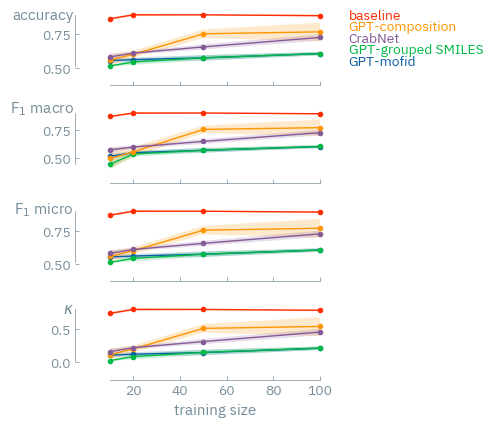

In [ ]:

fig, ax = plt.subplots(
    4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex="all"
)

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
    ax[i].plot(
        grouped_res.loc[2, :, "mofid"].index,
        grouped_res.loc[2, :, "mofid"][metric]["mean"],
        marker="o",
        label="GPT-mofid",
    )
    ax[i].fill_between(
        grouped_res.loc[2, :, "mofid"].index,
        grouped_res.loc[2, :, "mofid"][metric]["mean"]
        - grouped_res.loc[2, :, "mofid"][metric]["sem"],
        grouped_res.loc[2, :, "mofid"][metric]["mean"]
        + grouped_res.loc[2, :, "mofid"][metric]["sem"],
        alpha=0.2,
    )

    range_frame(ax[i],
        grouped_res.loc[2, :, "mofid"].index, np.stack(
            [grouped_res.loc[2, :, "mofid"][metric]["mean"], grouped_res.loc[2, :, "grouped_mof"][metric]["mean"], grouped_baseline_res.loc[2, :][metric]["mean"]]
        ).flatten()
    )
    
    ax[i].plot(
        grouped_res.loc[2, :, "grouped_mof"].index,
        grouped_res.loc[2, :, "grouped_mof"][metric]["mean"],
        marker="o",
        label="GPT-grouped SMILES",
    )
    ax[i].fill_between(
        grouped_res.loc[2, :, "grouped_mof"].index,
        grouped_res.loc[2, :, "grouped_mof"][metric]["mean"]
        - grouped_res.loc[2, :, "grouped_mof"][metric]["sem"],
        grouped_res.loc[2, :, "grouped_mof"][metric]["mean"]
        + grouped_res.loc[2, :, "grouped_mof"][metric]["sem"],
        alpha=0.2,
    )


    ax[i].plot(
        grouped_res.loc[2, :, "composition"].index,
        grouped_res.loc[2, :, "composition"][metric]["mean"],
        marker="o",
        label="GPT-composition",
    )
    ax[i].fill_between(
        grouped_res.loc[2, :, "composition"].index,
        grouped_res.loc[2, :, "composition"][metric]["mean"]
        - grouped_res.loc[2, :, "composition"][metric]["sem"],
        grouped_res.loc[2, :, "composition"][metric]["mean"]
        + grouped_res.loc[2, :, "composition"][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_baseline_res.loc[2, :].index,
        grouped_baseline_res.loc[2, :][metric]["mean"],
        marker="o",
        label="baseline",
    )
    ax[i].fill_between(
        grouped_baseline_res.loc[2, :].index,
        grouped_baseline_res.loc[2, :][metric]["mean"]
        - grouped_baseline_res.loc[2, :][metric]["sem"],
        grouped_baseline_res.loc[2, :][metric]["mean"]
        + grouped_baseline_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        extracted_crabnet_res_grouped.index,
        extracted_crabnet_res_grouped[metric]["mean"],
        marker="o",
        label="CrabNet",
    )
    ax[i].fill_between(
        extracted_crabnet_res_grouped.index,
        extracted_crabnet_res_grouped[metric]["mean"]
        - extracted_crabnet_res_grouped[metric]["sem"],
        extracted_crabnet_res_grouped[metric]["mean"]
        + extracted_crabnet_res_grouped[metric]["sem"],
        alpha=0.2,
    )

ax[-1].set_xlabel("training size", labelpad=4)
# ax[0].legend()

matplotx.line_labels(ax[0])

ylabel_top("accuracy", ax=ax[0], y_pad=0.1, x_pad=0.04)
ylabel_top(r"F$_{1}$ macro", ax=ax[1], y_pad=0.1, x_pad=0.04)
ylabel_top(r"F$_{1}$ micro", ax=ax[2],y_pad=0.1, x_pad=0.04)
ylabel_top(r"$\kappa$", ax=ax[3],y_pad=0.1, x_pad=0.04)
plt.subplots_adjust(hspace=.6, top=1, bottom=.2)
# fig.tight_layout()
fig.savefig("cv-classification_results_2.pdf", bbox_inches="tight")

In [ ]:
find_learning_curve_intersection(
    grouped_res.loc[2, :, "composition"]["f1_macro"]["mean"].values[0],
    fit_learning_curve(
        grouped_baseline_res.loc[2, :].index,
        grouped_baseline_res.loc[2, :]["f1_macro"]["mean"],
    )[0],
) / 10

0.23650683088985897

In [ ]:
find_learning_curve_intersection(
    grouped_res.loc[2, :, "composition"]["f1_macro"]["mean"].values[0],
    fit_learning_curve(
        extracted_crabnet_res_grouped.index,
        extracted_crabnet_res_grouped["f1_macro"]["mean"],
    )[0],
) / 10

0.7644745271864758

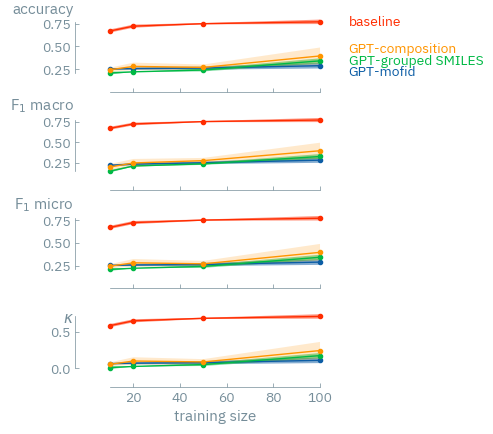

In [ ]:

fig, ax = plt.subplots(
    4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex="all"
)

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
    ax[i].plot(
        grouped_res.loc[5, :, "mofid"].index,
        grouped_res.loc[5, :, "mofid"][metric]["mean"],
        marker="o",
        label="GPT-mofid",
    )
    ax[i].fill_between(
        grouped_res.loc[5, :, "mofid"].index,
        grouped_res.loc[5, :, "mofid"][metric]["mean"]
        - grouped_res.loc[5, :, "mofid"][metric]["sem"],
        grouped_res.loc[5, :, "mofid"][metric]["mean"]
        + grouped_res.loc[5, :, "mofid"][metric]["sem"],
        alpha=0.5,
    )

    range_frame(ax[i],
        grouped_res.loc[5, :, "mofid"].index, np.stack(
            [grouped_res.loc[5, :, "mofid"][metric]["mean"], grouped_res.loc[5, :, "grouped_mof"][metric]["mean"], grouped_baseline_res.loc[5, :][metric]["mean"]]
        ).flatten()
    )

    ax[i].plot(
        grouped_res.loc[5, :, "grouped_mof"].index,
        grouped_res.loc[5, :, "grouped_mof"][metric]["mean"],
        marker="o",
        label="GPT-grouped SMILES",
    )
    ax[i].fill_between(
        grouped_res.loc[5, :, "grouped_mof"].index,
        grouped_res.loc[5, :, "grouped_mof"][metric]["mean"]
        - grouped_res.loc[5, :, "grouped_mof"][metric]["sem"],
        grouped_res.loc[5, :, "grouped_mof"][metric]["mean"]
        + grouped_res.loc[5, :, "grouped_mof"][metric]["sem"],
        alpha=0.5,
    )


    ax[i].plot(
        grouped_res.loc[5, :, "composition"].index,
        grouped_res.loc[5, :, "composition"][metric]["mean"],
        marker="o",
        label="GPT-composition",
    )
    ax[i].fill_between(
        grouped_res.loc[5, :, "composition"].index,
        grouped_res.loc[5, :, "composition"][metric]["mean"]
        - grouped_res.loc[5, :, "composition"][metric]["sem"],
        grouped_res.loc[5, :, "composition"][metric]["mean"]
        + grouped_res.loc[5, :, "composition"][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_baseline_res.loc[5, :].index,
        grouped_baseline_res.loc[5, :][metric]["mean"],
        marker="o",
        label="baseline",
    )
    ax[i].fill_between(
        grouped_baseline_res.loc[5, :].index,
        grouped_baseline_res.loc[5, :][metric]["mean"]
        - grouped_baseline_res.loc[5, :][metric]["sem"],
        grouped_baseline_res.loc[5, :][metric]["mean"]
        + grouped_baseline_res.loc[5, :][metric]["sem"],
        alpha=0.5,
    )

ax[-1].set_xlabel("training size", labelpad=4)
# ax[0].legend()

matplotx.line_labels(ax[0])

ylabel_top("accuracy", ax=ax[0], y_pad=0.01, x_pad=0.04)
ylabel_top(r"F$_{1}$ macro", ax=ax[1], y_pad=0.01, x_pad=0.04)
ylabel_top(r"F$_{1}$ micro", ax=ax[2],y_pad=0.01, x_pad=0.04)
ylabel_top(r"$\kappa$", ax=ax[3],y_pad=0.01, x_pad=0.04)
plt.subplots_adjust(hspace=.6, top=1, bottom=.2)
# fig.tight_layout()
fig.savefig("cv-classification_results_5.pdf", bbox_inches="tight")